# Network blending in StyleGAN

Swapping layers between two models in StyleGAN. The base model is trained on real cat images and the second model is fine-tuned from the base and trained on watercolor cat images.

In [ ]:
!git clone https://github.com/justinpinkney/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 2.32 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [ ]:
%cd stylegan2

/content/stylegan2


In [ ]:
%tensorflow_version 1.x
!pip install typer

TensorFlow 1.x selected.


Command line help for the blending function is below. Make sure that you specify either `--output-grid` to save an example image or `--output-pkl` to save the modified pkl. (Currently only the the Gs network is modified)

- low_res_pkl: Path, # Pickle file from which to take low res layers
- high_res_pkl: Path, # Pickle file from which to take high res layers
- resolution: int, # Resolution level at which to switch between models
- level: int  = 0, # Switch at Conv block 0 or 1?
- blend_width: Optional[float] = None, # None = hard switch, float = smooth switch (logistic) with given width
- output_grid: Optional[Path] = "blended.jpg", # Path of image file to save example grid (None = don't save)
- seed: int = 0, # seed for random grid
- output_pkl: Optional[Path] = None, # Output path of pickle (None = don't save)
- verbose: bool = False, # Print out the exact blending fraction

         

In [ ]:
%pwd

'/content/stylegan2'

In [ ]:
from IPython.display import Image
import blend_models


Time to try out a bunch of different resolutions for the switch and display the results. The real cat model provides the low-resolution layers, i.e. the "structure", and the anime cat model the high-resolution, i.e. the "texture"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
low_res = "/content/drive/My Drive/CS 230/saves/00011-stylegan2-real_cats_cropped-1gpu-config-f/network-snapshot-018102.pkl"
high_res = "/content/drive/My Drive/CS 230/saves/00012-stylegan2-watercolor_cats-1gpu-config-f/network-snapshot-010056.pkl"

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
blending at 8x8


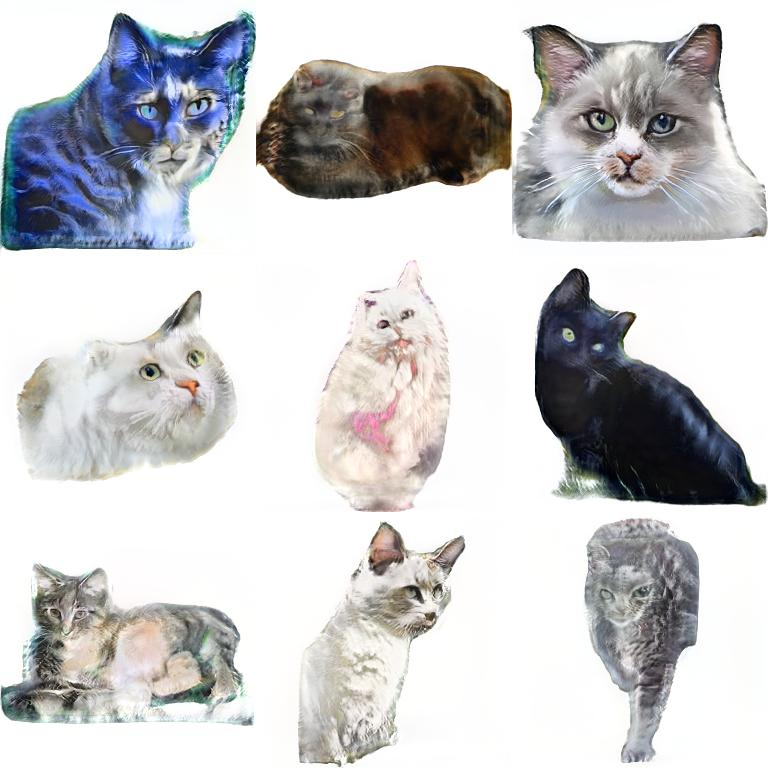

blending at 16x16


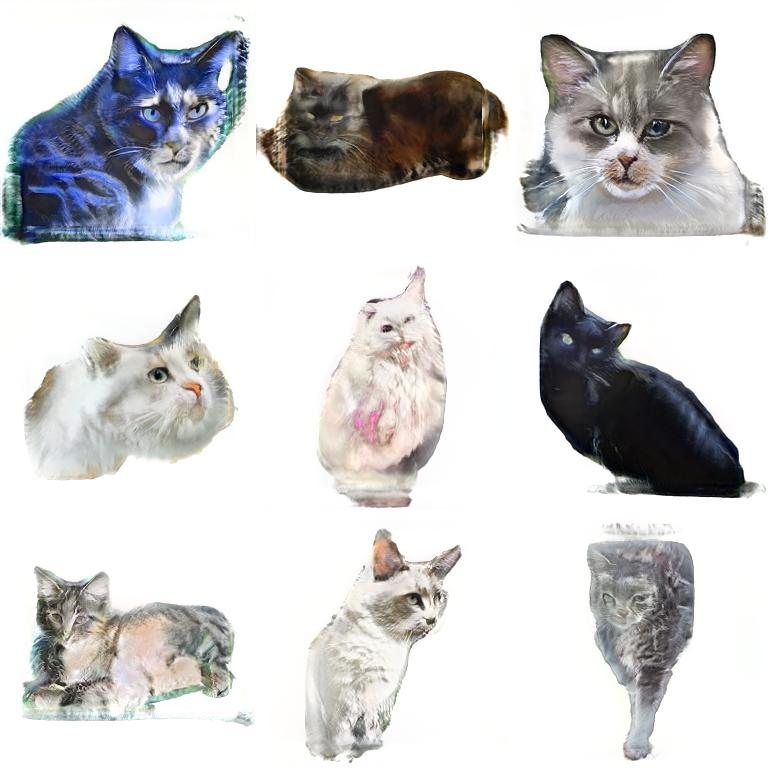

blending at 32x32


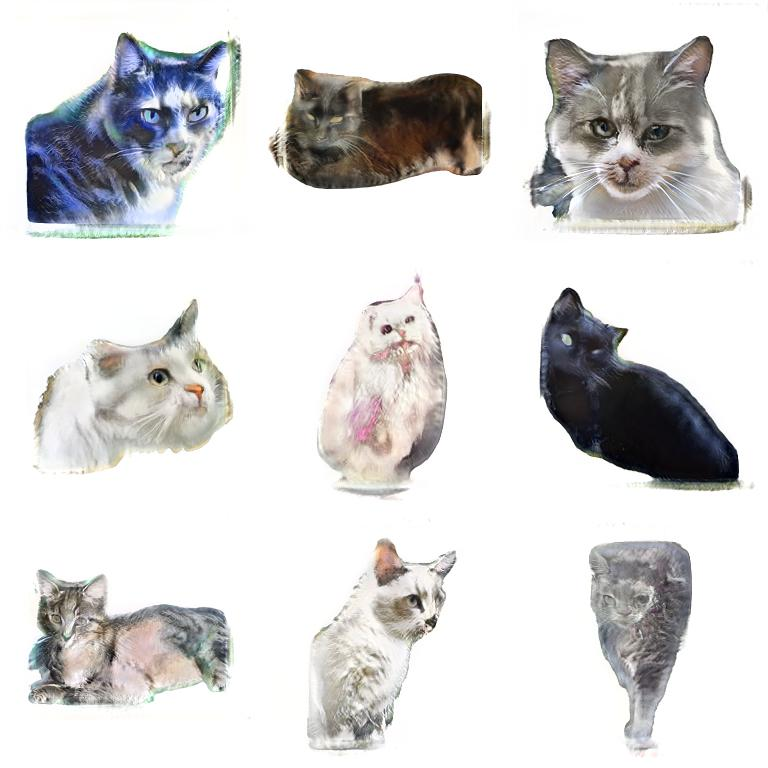

blending at 64x64


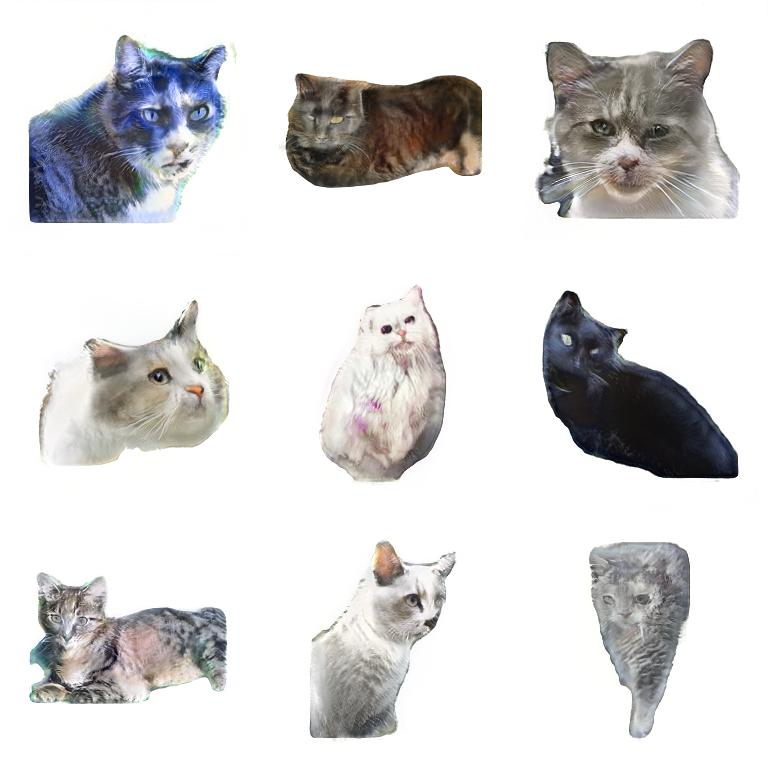

blending at 128x128


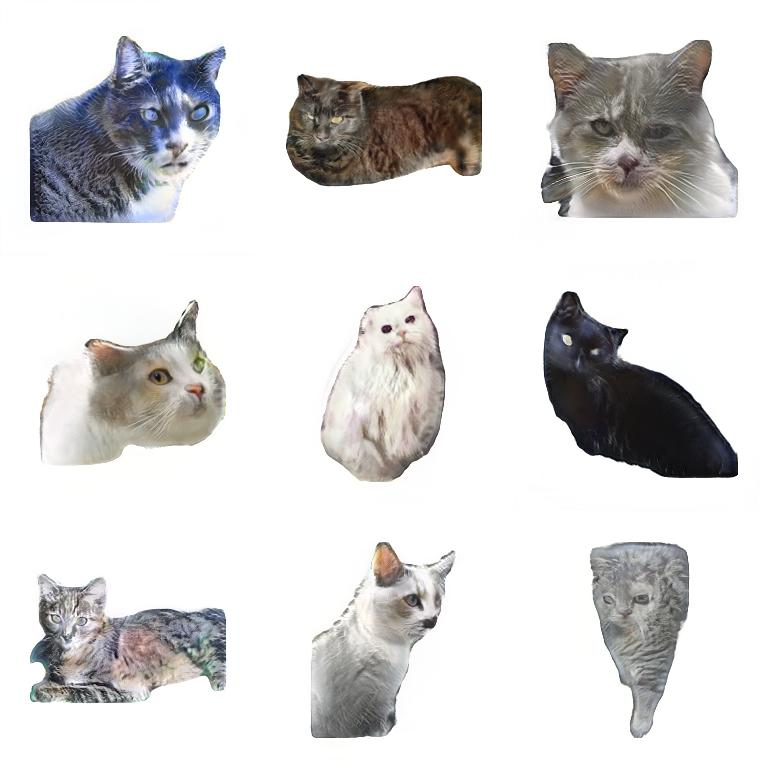

In [ ]:

resolutions = (8, 16, 32, 64, 128)
for res in resolutions:
  filename = f"blended-{res}.jpg"
  blend_models.main(low_res, high_res, res, output_grid=filename)
  img = Image(filename=filename)
  print(f"blending at {res}x{res}")
  display(img)

In [ ]:
blend_models.main(low_res, high_res, 16, output_pkl="/content/drive/My Drive/CS 230/cat_blended_16.pkl")

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
